In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# device config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# general hyper parameters
num_epochs = 50
batch_size = 64
learning_rate = 1e-4
image_size = 784    # 28 * 28

In [4]:
# hyper parameters for the discriminator
d_hidden_size = 128
d_ksteps = 1

In [5]:
# hyper parameters for the generator
latent_dim = 128
g_hidden_size = 256

In [8]:
# Get the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))])


mnist_train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# TODO test_dataset

mnist_train_loader = torch.utils.data.DataLoader(dataset=mnist_train_dataset, batch_size=batch_size, shuffle=False)

# TODO test_loader

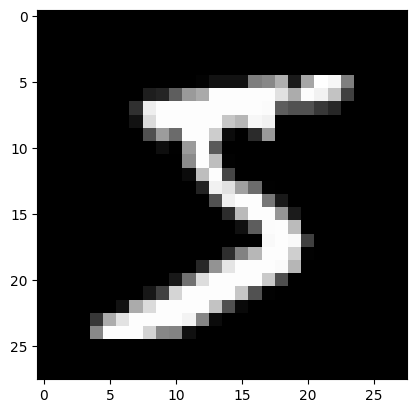

In [9]:
dataiter = iter(mnist_train_loader)
images, labels = next(dataiter)
image = np.array(images[0], dtype="float")
image = image / 2 + 0.5
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap="gray")
plt.show()

In [10]:
# Define the discriminator, returns a value between 0 and 1, a possibility.
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            # nn.LeakyReLU(0.01),
            # nn.Linear(hidden_size, hidden_size),
            # nn.Tanh(),
            # nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.01),
            nn.Linear(hidden_size, 1),
            nn.Dropout(0.2),
            nn.Sigmoid(),
        )
        # self.l1 = nn.Linear(input_size, hidden_size)
        # self.relu = nn.ReLU()
        # self.l2 = nn.Linear(hidden_size, hidden_size)
        # self.l3 = nn.Linear(hidden_size, 1)
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.disc(x)
        # out = self.l1(x)
        # out = self.relu(out)
        # out = self.l2(out)
        # out = self.relu(out)
        # out = self.l3(out)
        # out = self.sigmoid(out)
        return out

In [12]:
# Define the generator, returns a tensor with shape (3, 32, 32)
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_size):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(latent_dim, hidden_size),
            nn.LeakyReLU(0.01),
            nn.Linear(hidden_size, image_size),
            nn.Tanh(),      
        )
        # self.l1 = nn.Linear(latent_dim_size, hidden_size)
        # self.relu = nn.ReLU()
        # self.tanh = nn.Tanh()
        # self.l2 = nn.Linear(hidden_size, int(d_input_size / 2))
        # self.l3 = nn.Linear(int(d_input_size / 2), d_input_size)

    def forward(self, z):
        out = self.gen(z)
        # out = self.l1(z)
        # out = self.tanh(out)
        # out = self.l2(out)
        # out = self.tanh(out)
        # out = self.l3(out)
        # out = self.tanh(out)
        return out
        

In [14]:
# Create the generator, the discriminator, their respective optimizers and loss criterion
generator = Generator(latent_dim, g_hidden_size).to(device)

discriminator = Discriminator(image_size, d_hidden_size).to(device)

genopt = torch.optim.Adam(generator.parameters(), lr=learning_rate)

discopt = torch.optim.Adam(discriminator.parameters(), lr=learning_rate)

criterion = nn.BCELoss()

epoch 1 / 50, step 100 / 938, gen_loss = 0.6802, disc_loss = 0.4747
epoch 1 / 50, step 200 / 938, gen_loss = 0.6860, disc_loss = 0.5358
epoch 1 / 50, step 300 / 938, gen_loss = 0.9066, disc_loss = 0.4704
epoch 1 / 50, step 400 / 938, gen_loss = 0.7678, disc_loss = 0.4847
epoch 1 / 50, step 500 / 938, gen_loss = 0.6849, disc_loss = 0.6024
torch.Size([1, 784])
tensor([[0.5327]], device='cuda:0', grad_fn=<SigmoidBackward0>)


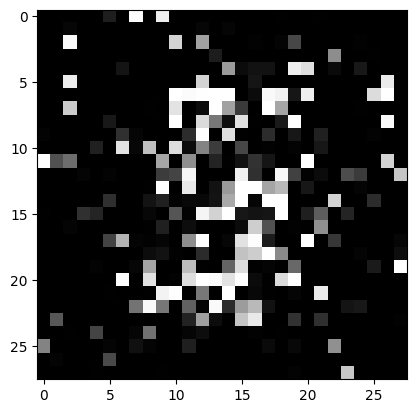

epoch 1 / 50, step 600 / 938, gen_loss = 0.7395, disc_loss = 0.5197
epoch 1 / 50, step 700 / 938, gen_loss = 0.8739, disc_loss = 0.4953
epoch 1 / 50, step 800 / 938, gen_loss = 0.7780, disc_loss = 0.5526
epoch 1 / 50, step 900 / 938, gen_loss = 0.8640, disc_loss = 0.5223
epoch 2 / 50, step 100 / 938, gen_loss = 0.8489, disc_loss = 0.5391
epoch 2 / 50, step 200 / 938, gen_loss = 0.6979, disc_loss = 0.6728
epoch 2 / 50, step 300 / 938, gen_loss = 0.7185, disc_loss = 0.6144
epoch 2 / 50, step 400 / 938, gen_loss = 0.6817, disc_loss = 0.6815
epoch 2 / 50, step 500 / 938, gen_loss = 0.9022, disc_loss = 0.5306
torch.Size([1, 784])
tensor([[0.1933]], device='cuda:0', grad_fn=<SigmoidBackward0>)


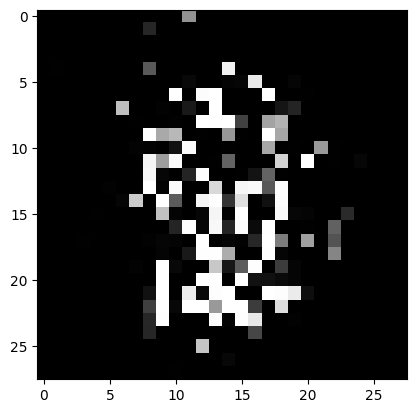

epoch 2 / 50, step 600 / 938, gen_loss = 0.9903, disc_loss = 0.5208
epoch 2 / 50, step 700 / 938, gen_loss = 0.6435, disc_loss = 0.6851
epoch 2 / 50, step 800 / 938, gen_loss = 0.9121, disc_loss = 0.5425
epoch 2 / 50, step 900 / 938, gen_loss = 0.8359, disc_loss = 0.6146
epoch 3 / 50, step 100 / 938, gen_loss = 0.8122, disc_loss = 0.5765
epoch 3 / 50, step 200 / 938, gen_loss = 0.8895, disc_loss = 0.5712
epoch 3 / 50, step 300 / 938, gen_loss = 0.9130, disc_loss = 0.4581
epoch 3 / 50, step 400 / 938, gen_loss = 1.0262, disc_loss = 0.4504
epoch 3 / 50, step 500 / 938, gen_loss = 0.7409, disc_loss = 0.6812
torch.Size([1, 784])
tensor([[0.3613]], device='cuda:0', grad_fn=<SigmoidBackward0>)


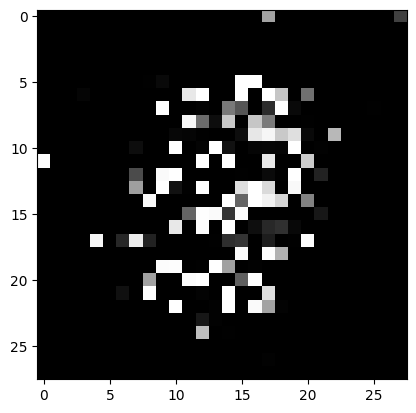

epoch 3 / 50, step 600 / 938, gen_loss = 0.9334, disc_loss = 0.4999
epoch 3 / 50, step 700 / 938, gen_loss = 0.8768, disc_loss = 0.5665
epoch 3 / 50, step 800 / 938, gen_loss = 0.6767, disc_loss = 0.7072
epoch 3 / 50, step 900 / 938, gen_loss = 0.8204, disc_loss = 0.5561
epoch 4 / 50, step 100 / 938, gen_loss = 0.7728, disc_loss = 0.6665
epoch 4 / 50, step 200 / 938, gen_loss = 0.8896, disc_loss = 0.5600
epoch 4 / 50, step 300 / 938, gen_loss = 0.6801, disc_loss = 0.6814
epoch 4 / 50, step 400 / 938, gen_loss = 0.7214, disc_loss = 0.6453
epoch 4 / 50, step 500 / 938, gen_loss = 0.7851, disc_loss = 0.6163
torch.Size([1, 784])
tensor([[0.4903]], device='cuda:0', grad_fn=<SigmoidBackward0>)


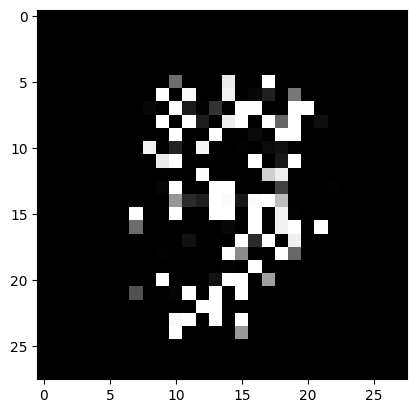

epoch 4 / 50, step 600 / 938, gen_loss = 0.8802, disc_loss = 0.6135
epoch 4 / 50, step 700 / 938, gen_loss = 0.7554, disc_loss = 0.7093
epoch 4 / 50, step 800 / 938, gen_loss = 1.1666, disc_loss = 0.4371
epoch 4 / 50, step 900 / 938, gen_loss = 0.7185, disc_loss = 0.6692
epoch 5 / 50, step 100 / 938, gen_loss = 0.8463, disc_loss = 0.6128
epoch 5 / 50, step 200 / 938, gen_loss = 0.7881, disc_loss = 0.5856
epoch 5 / 50, step 300 / 938, gen_loss = 0.8152, disc_loss = 0.6414


In [15]:
# Training the models
n_total_steps = len(mnist_train_loader)
for epoch in range(num_epochs):
    for i, (real, labels) in enumerate(mnist_train_loader):
        # Sample minibatch of batch_size noise samples
        z = torch.randn(batch_size, latent_dim).to(device)

        real.to(device)

        # Train the generator

        # forward pass
        generator_output = generator(z)
        discriminator_output = discriminator(generator_output)
        gen_loss = -(discriminator_output.log()).mean(0)
        # best loss = 0, pretty bad loss = 0.7
        #one_minus = torch.ones_like(discriminator_output) - discriminator_output
        #gen_loss = (one_minus.log()).mean(0)


        # backward pass
        genopt.zero_grad()
        gen_loss.backward()
        genopt.step()

        
        # Train the discriminator
        discriminator.train()   # enable dropout

        z = torch.randn(batch_size, latent_dim).to(device)

        # forward pass
        first_probs = discriminator(real.view(real.shape[0], -1).to(device))
        #print("first_probs shape: ", first_probs.shape)
        generator_output = generator(z)
        discriminator_output = discriminator(generator_output)
        second_probs = torch.ones_like(discriminator_output) - discriminator_output
        #print("second_probs shape: ", second_probs.shape)

        # Calculate the loss

        # 1) first part
        first_loss = -(first_probs.log()).mean(0)
        #print(first_loss.item())

        second_loss = -(second_probs.log()).mean(0)
        #print(second_loss.item())

        final_disc_loss = (first_loss + second_loss) / 2

        # backward pass
        discopt.zero_grad()
        final_disc_loss.backward()
        discopt.step()

        if (i + 1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs}, step {i + 1} / {n_total_steps}, gen_loss = {gen_loss.item():.4f}, disc_loss = {final_disc_loss.item():.4f}')

        if (i + 1) % 500 == 0:
            # Sample an image from the generator
            discriminator.eval()    # Disable dropout

            z1 = (torch.randn(1, latent_dim) * 10).to(device)

            image = generator(z1)[0].cpu().view(1, -1)
            print(image.shape)

            discriminator_output = discriminator(image.to(device))
            print(discriminator_output)

            # Show the image (MNIST)
            pixels = image.detach().reshape((28, 28))
            plt.imshow(pixels, cmap="gray")
            plt.show()
            

In [127]:
# Sample an image from the generator (MNIST)
z1 = (torch.randn(1, latent_dim) * 10).to(device)


image = generator(z1)[0].cpu().view(1, -1)
print(image.shape)

discriminator_output = discriminator(image.to(device))
print(discriminator_output)


# Show the image
pixels = image.detach().reshape((28, 28))
plt.imshow(pixels, cmap="gray")
plt.show()

torch.Size([1, 3072])
tensor([[0.0273]], device='cuda:0', grad_fn=<SigmoidBackward0>)


RuntimeError: shape '[28, 28]' is invalid for input of size 3072